## This part is just using some simple strategies. 

In financial markets, there are many useful technical indicators. Sometimes, just a combination with a few indicators can construct a effective trading strategies at certain period of time.

Try using MA just using the Closeprice every ten minutes.

In [1]:
import pickle
Closeprice_every10m = open('.\Dataset_B02_10mins.pkl', 'rb')
data = pickle.load(Closeprice_every10m)

In [2]:
data

[262,
 263,
 262,
 256,
 252,
 262,
 257,
 261,
 262,
 257,
 253,
 252,
 253,
 258,
 250,
 252,
 248,
 239,
 239,
 242,
 243,
 242,
 245,
 242,
 242,
 241,
 243,
 232,
 237,
 247,
 243,
 244,
 234,
 242,
 246,
 247,
 244,
 242,
 237,
 249,
 245,
 247,
 241,
 249,
 242,
 245,
 245,
 244,
 243,
 242,
 241,
 243,
 241,
 240,
 245,
 245,
 247,
 246,
 250,
 253,
 254,
 241,
 244,
 247,
 247,
 244,
 238,
 236,
 235,
 249,
 248,
 244,
 248,
 239,
 242,
 242,
 239,
 245,
 237,
 236,
 239,
 236,
 235,
 236,
 242,
 244,
 240,
 238,
 244,
 248,
 253,
 247,
 253,
 246,
 241,
 243,
 239,
 246,
 254,
 244,
 243,
 246,
 245,
 245,
 254,
 251,
 254,
 244,
 237,
 244,
 245,
 249,
 245,
 251,
 251,
 252,
 254,
 248,
 243,
 251,
 256,
 250,
 253,
 246,
 249,
 255,
 264,
 256,
 252,
 254,
 251,
 251,
 262,
 271,
 272,
 274,
 266,
 271,
 277,
 281,
 278,
 282,
 288,
 281,
 284,
 287,
 291,
 294,
 288,
 290,
 299,
 297,
 283,
 286,
 295,
 293,
 290,
 290,
 289,
 290,
 293,
 308,
 292,
 295,
 298,
 290,
 296

In [3]:
# calculate the average of past five points 
def ma5(list1):
    newlist = []
    for i in range(len(list1)):
        if i <4:   # when there is not enough past datapoints  just assign the average of the total past datapoints
            ave = sum(list1[:(i+1)])/(i+1)
            newlist.append(ave)
        else:
            ave = 1.0* sum(list1[i-4:i+1])/5
            newlist.append(ave)
    return newlist

In [4]:
def ma10(list1):
    newlist = []
    for i in range(len(list1)):
        if i <9:
            ave = sum(list1[:(i+1)])/(i+1)
            newlist.append(ave)
        else:
            ave = sum(list1[i-9:i+1])/10
            newlist.append(ave)
    return newlist

In [5]:
def ma30(list1):
    newlist = []
    for i in range(len(list1)):
        if i <29:
            ave = sum(list1[:i+1])/(i+1)
            newlist.append(ave)
        else:
            ave = sum(list1[i-29:i+1])/30
            newlist.append(ave)
    return newlist

In [6]:
MA10 = ma10(data)
MA30 = ma30(data)

In [7]:
import pandas as pd
dict1 = {'price': data, 'MA10': MA10, 'MA30': MA30}
df = pd.DataFrame(dict1)

In [8]:
df.head()

,price,MA10,MA30
0,262,262.000000,262.000000
1,263,262.500000,262.500000
2,262,262.333333,262.333333
3,256,260.750000,260.750000
4,252,259.000000,259.000000


The simple stragety is that when the ma10 is bigger than ma30 buy or hold; smaller than  MA30 sell

In [9]:
df = df.assign(hold_or_not = (df['MA10']>df['MA30']).astype(int))

In [10]:
df = df.assign(buy_or_sell = df['hold_or_not'].diff())

In [11]:
# pd.set_option("display.max_rows",500)
df.head(50)

,price,MA10,MA30,hold_or_not,buy_or_sell
0,262,262.000000,262.000000,0,NaN
1,263,262.500000,262.500000,0,0.0
2,262,262.333333,262.333333,0,0.0
3,256,260.750000,260.750000,0,0.0
4,252,259.000000,259.000000,0,0.0
5,262,259.500000,259.500000,0,0.0
6,257,259.142857,259.142857,0,0.0
7,261,259.375000,259.375000,0,0.0
8,262,259.666667,259.666667,0,0.0
9,257,259.400000,259.400000,0,0.0


In [12]:
# define the trading action function
def trading(df,initial_money =1):
    money = initial_money
    for i in range(df.shape[0]):
        state = df['buy_or_sell'][i]
        
        if state == 1:
            buyprice = df['price'][i]
            print('{}mins，buy at {}'.format((i+1)*10, buyprice))
        if state == -1:
            sellprice = df['price'][i]
            money = money*(sellprice/buyprice)
#             total_revenue_rate =  (money - initial_money)/initial_money
            print('{}mins, sell at {}，total_money:{}'.format((i+1)*10, sellprice,money))

        if i == df.shape[0]-1 and df['hold_or_not'][i] == 1:
            money = money* df.price[i]/buyprice
    gain = money - initial_money
    return gain


In [13]:
trading(df)

430mins，buy at 241
540mins, sell at 240，total_money:0.995850622406639
550mins，buy at 245
580mins, sell at 246，total_money:0.9999153188246254
590mins，buy at 250
690mins, sell at 235，total_money:0.9399203996951478
920mins，buy at 247
1720mins, sell at 279，total_money:1.0616914636232642
2360mins，buy at 265
2390mins, sell at 250，total_money:1.0015957203993058
3190mins，buy at 221
3330mins, sell at 210，total_money:0.9517425397459466
3830mins，buy at 193
4230mins, sell at 210，total_money:1.0355747841795275
4240mins，buy at 215
4330mins, sell at 204，total_money:0.9825918882447611
4510mins，buy at 210
5140mins, sell at 206，total_money:0.9638758522781942
5400mins，buy at 213
5440mins, sell at 209，total_money:0.9457748973058336
5920mins，buy at 197
6040mins, sell at 192，total_money:0.9217704582879191
6320mins，buy at 190
6710mins, sell at 200，total_money:0.9702846929346517
7100mins，buy at 208
7210mins, sell at 191，total_money:0.8909825786082618
7400mins，buy at 196
7630mins, sell at 192，total_money:0.872

-0.36960191404361376

The result is that two months later, total loss is nearly forty percentage of the initial money. This simple stragety is poor on this stock during this period.

 Then still MA, we just try to use weighted average. We assume that closer the time to the current, the more important the price is.

In [14]:
def ma10_w(list1):
    newlist = []
    for i in range(len(list1)):
        if i <9:
            ave = sum(list1[:(i+1)])/(i+1)
            newlist.append(ave)
        else:
            ave = sum(list1[i-9:i-2]) *0.15/8 +0.25*list1[i-1] + 0.6*list1[i]  # the weights are allocated at will
            newlist.append(ave)
    return newlist

In [15]:
def ma30_w(list1):
    newlist = []
    for i in range(len(list1)):
        if i <29:
            ave = sum(list1[:i+1])/(i+1)
            newlist.append(ave)
        else:
            ave = sum(list1[i-29:i-2])*0.3/28  +0.2*list1[i-1]+0.5*list1[i]
            newlist.append(ave)
    return newlist

In [16]:
MA10 = ma10_w(data)
MA30 = ma30_w(data)

In [17]:
import pandas as pd
dict2 = {'price': data, 'MA10': MA10, 'MA30': MA30}
df2 = pd.DataFrame(dict2)

In [18]:
df2 = df2.assign(hold_or_not = (df2['MA10']>df2['MA30']).astype(int))
df2 = df2.assign(buy_or_sell = df2['hold_or_not'].diff())
df2.head(50)

,price,MA10,MA30,hold_or_not,buy_or_sell
0,262,262.000000,262.000000,0,NaN
1,263,262.500000,262.500000,0,0.0
2,262,262.333333,262.333333,0,0.0
3,256,260.750000,260.750000,0,0.0
4,252,259.000000,259.000000,0,0.0
5,262,259.500000,259.500000,0,0.0
6,257,259.142857,259.142857,0,0.0
7,261,259.375000,259.375000,0,0.0
8,262,259.666667,259.666667,0,0.0
9,257,253.712500,259.400000,0,0.0


In [19]:
trading(df2)

1270mins，buy at 264
1280mins, sell at 256，total_money:0.9696969696969697
1340mins，buy at 271
1640mins, sell at 295，total_money:1.0555741921055573
1650mins，buy at 298
1660mins, sell at 290，total_money:1.0272366299013813
3920mins，buy at 205
3950mins, sell at 199，total_money:0.9971711675628043
3970mins，buy at 207
3980mins, sell at 197，total_money:0.9489986473906882
4080mins，buy at 212
4140mins, sell at 208，total_money:0.9310930125342601
5030mins，buy at 224
5080mins, sell at 222，total_money:0.9227796820652042
6440mins，buy at 205
6460mins, sell at 200，total_money:0.9002728605514188
6470mins，buy at 200
6480mins, sell at 196，total_money:0.8822674033403903
6490mins，buy at 204
6650mins, sell at 200，total_money:0.8649680424905787
7750mins，buy at 211
7770mins, sell at 202，total_money:0.8280736710099379
7780mins，buy at 208
7790mins, sell at 202，total_money:0.8041869305000359
7810mins，buy at 206
8240mins, sell at 249，total_money:0.9720511926917909
9850mins，buy at 197
9870mins, sell at 188，total_mon

-0.7653495960889746

The result is out expectation. Just a try. When we get such a low result, we just want to try a simpler one with MA5 and price, if price is higher than MA5, than buy or hold. Let's have a see.

In [20]:
MA5 = ma5(data)

In [21]:
import pandas as pd
dict3 = {'price': data, 'MA5': MA5}
df3 = pd.DataFrame(dict3)

In [22]:
df3 = df3.assign(hold_or_not = (df3['price']>df3['MA5']).astype(int))
df3 = df3.assign(buy_or_sell = df3['hold_or_not'].diff())
df3.head(50)

,price,MA5,hold_or_not,buy_or_sell
0,262,262.000000,0,NaN
1,263,262.500000,1,1.0
2,262,262.333333,0,-1.0
3,256,260.750000,0,0.0
4,252,259.000000,0,0.0
5,262,259.000000,1,1.0
6,257,257.800000,0,-1.0
7,261,257.600000,1,1.0
8,262,258.800000,1,0.0
9,257,259.800000,0,-1.0


In [24]:
def trading(df,initial_money =1000):
    money = initial_money
    money_memory =[money]
    for i in range(df.shape[0]):
        state = df['buy_or_sell'][i]
        
        if state == 1:
            buyprice = df['price'][i]
            print('{}mins，buy at {}'.format((i+1)*10, buyprice))
        if state == -1:
            sellprice = df['price'][i]
            money = money*(sellprice/buyprice)
#             total_revenue_rate =  (money - initial_money)/initial_money
            print('{}mins, sell at {}，total_money:{}'.format((i+1)*10, sellprice,money))

        if i == df.shape[0]-1 and df['hold_or_not'][i] == 1:
            money = money* df.price[i]/buyprice
        money_memory.append(money)
#     gain = money - initial_money
        
    return money_memory

In [25]:
result =trading(df3)

20mins，buy at 263
30mins, sell at 262，total_money:996.1977186311786
60mins，buy at 262
70mins, sell at 257，total_money:977.1863117870722
80mins，buy at 261
100mins, sell at 257，total_money:962.2102763573853
140mins，buy at 258
150mins, sell at 250，total_money:932.3742987959159
210mins，buy at 243
240mins, sell at 242，total_money:928.5373675251509
270mins，buy at 243
280mins, sell at 232，total_money:886.5048117935597
300mins，buy at 247
330mins, sell at 234，total_money:839.8466638044249
350mins，buy at 246
380mins, sell at 242，total_money:826.1906204905318
400mins，buy at 249
430mins, sell at 241，total_money:799.6463435269807
440mins，buy at 249
450mins, sell at 242，total_money:777.1663258374672
460mins，buy at 245
480mins, sell at 244，total_money:773.9942183850693
520mins，buy at 243
530mins, sell at 241，total_money:767.623895600007
550mins，buy at 245
620mins, sell at 241，total_money:755.0912605698028
650mins，buy at 247
660mins, sell at 244，total_money:745.9201116559996
700mins，buy at 249
740mins

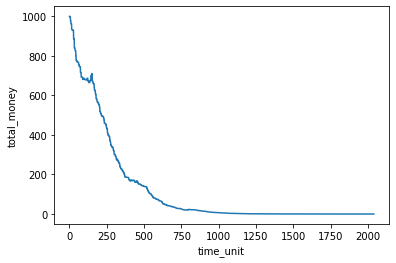

In [27]:
import matplotlib.pyplot as plt
plt.plot(result)
plt.xlabel("time_unit")
plt.ylabel("total_money")
plt.show()

So strange, we get the result of zero. The common use strategy seems to have no advantage.

# However, if we think in another way, because we fail in the correct direction, we are likely to succeed in the incorrect direction. Have a try.

In [25]:
import pandas as pd
dict4 = {'price': data, 'MA5': MA5}
df4 = pd.DataFrame(dict4)

In [26]:
df4 = df4.assign(hold_or_not = (df4['MA5']>df4['price']).astype(int))  # change the signal 

df4 = df4.assign(buy_or_sell = df4['hold_or_not'].diff())
df4.head(50)

,price,MA5,hold_or_not,buy_or_sell
0,262,262.000000,0,NaN
1,263,262.500000,0,0.0
2,262,262.333333,1,1.0
3,256,260.750000,1,0.0
4,252,259.000000,1,0.0
5,262,259.000000,0,-1.0
6,257,257.800000,1,1.0
7,261,257.600000,0,-1.0
8,262,258.800000,0,0.0
9,257,259.800000,1,1.0


In [27]:
def trading(df,initial_money =1000):
    money = initial_money
    money_memory =[money]
    for i in range(df.shape[0]):
        state = df['buy_or_sell'][i]
        
        if state == 1:
            buyprice = df['price'][i]
            print('{}mins，buy at {}'.format((i+1)*10, buyprice))
        if state == -1:
            sellprice = df['price'][i]
            money = money*(sellprice/buyprice)
#             total_revenue_rate =  (money - initial_money)/initial_money
            print('{}mins, sell at {}，total_money:{}'.format((i+1)*10, sellprice,money))

        if i == df.shape[0]-1 and df['hold_or_not'][i] == 1:
            money = money* df.price[i]/buyprice
        money_memory.append(money)
#     gain = money - initial_money
        
    return money_memory

In [28]:
result =trading(df4)

30mins，buy at 262
60mins, sell at 262，total_money:1000.0
70mins，buy at 257
80mins, sell at 261，total_money:1015.5642023346303
100mins，buy at 257
140mins, sell at 258，total_money:1019.5158140168662
150mins，buy at 250
210mins, sell at 243，total_money:990.969371224394
240mins，buy at 242
270mins, sell at 243，total_money:995.0642859815197
280mins，buy at 232
300mins, sell at 247，total_money:1059.4003389544628
330mins，buy at 234
340mins, sell at 242，total_money:1095.619153961453
380mins，buy at 242
400mins, sell at 249，total_money:1127.3106170925696
430mins，buy at 241
440mins, sell at 249，total_money:1164.7317164151445
450mins，buy at 242
460mins, sell at 245，total_money:1179.1705393459108
480mins，buy at 244
520mins, sell at 243，total_money:1174.3378732010506
530mins，buy at 241
550mins, sell at 245，total_money:1193.828958233433
620mins，buy at 241
650mins, sell at 247，total_money:1223.5508410110288
660mins，buy at 244
700mins, sell at 249，total_money:1248.6236041465006
740mins，buy at 239
780mins,

Text(0, 0.5, 'total_money')

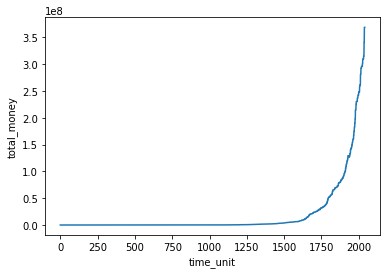

In [32]:
import matplotlib.pyplot as plt
plt.plot(result)
plt.xlabel("time_unit")
plt.ylabel("total_money")

Amazing but as expected, we get a total gain more than 360000000. It is really inspiring to get such a high gain.

## conclusion

From the trial, we can have a perfect simple strategy for the stock in such a period:when the price is smaller than MA5 , buy it and when the price is higher than MA5, sell it.